# Lab 09. Support Vector Machines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import scikitplot as skplt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

## 1. Support Vector Classifier

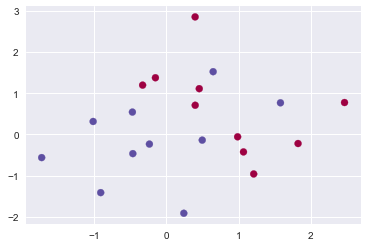

In [11]:
np.random.seed(42)

X = np.random.normal(size=40).reshape(20,2)
y = np.concatenate((np.ones(10, dtype=np.int64)*-1, np.ones(10, dtype=np.int64)))
X[y==1, :] += 1

plt.scatter(X[:,0], X[:,1], c=(3-y), cmap = 'Spectral')

In [13]:
#modeling

"""
SVC(
    kernel = {'linear','poly','rbf','sigmoid','precomputed'}
    kernel = 'linear' => linear deicision boundary
    kernel = 'rbf' (default) => nonlinear decision boundary
    gamma = {'scale', 'auto', 숫자}
    gamma : Kernel coefficient for 'rbf', 'poly' , 'sigmoid'
    C : Regularization parameter
)
"""
svc = SVC(kernel='linear', C=10) 
svc.fit(X, y) 

SVC(C=10, kernel='linear')

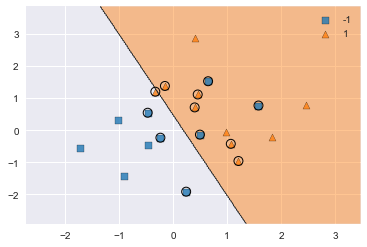

In [14]:
#decision boundary
plot_decision_regions(X, y, clf=svc, X_highlight=svc.support_vectors_)

In [15]:
# support vectors
pd.DataFrame(svc.support_vectors_, index=svc.support_)

,0,1
0,0.496714,-0.138264
1,0.647689,1.523030
2,-0.234153,-0.234137
3,1.579213,0.767435
4,-0.469474,0.542560
6,0.241962,-1.913280
11,1.067528,-0.424748
12,0.455617,1.110923
13,-0.150994,1.375698
14,0.399361,0.708306


In [16]:
svc2 = SVC(kernel='linear', C=0.1)
svc2.fit(X,y)

SVC(C=0.1, kernel='linear')

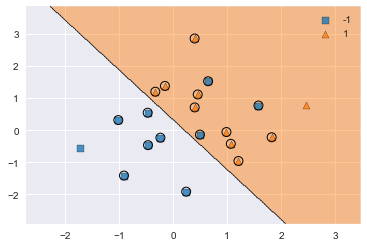

In [17]:
plot_decision_regions(X, y, clf=svc2, X_highlight=svc2.support_vectors_)

In [18]:
pd.DataFrame(svc2.support_vectors_, index = svc2.support_)

,0,1
0,0.496714,-0.138264
1,0.647689,1.523030
2,-0.234153,-0.234137
3,1.579213,0.767435
4,-0.469474,0.542560
5,-0.463418,-0.465730
6,0.241962,-1.913280
8,-1.012831,0.314247
9,-0.908024,-1.412304
11,1.067528,-0.424748


In [19]:
#GridSearch

#grid space
c_space = np.array([0.001, 0.01, 0.1, 1, 5, 10, 100])
param_grid = {'C':c_space}

In [21]:
svc3 = SVC(kernel='linear')
tune = GridSearchCV(svc3, param_grid, cv=10)
tune.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 5.e+00, 1.e+01, 1.e+02])})

In [22]:
tune.cv_results_

{'mean_fit_time': array([0.00076711, 0.00052085, 0.00104246, 0.00125997, 0.00081656,
        0.00156217, 0.        ]),
 'std_fit_time': array([0.00052932, 0.00096955, 0.00238287, 0.00235911, 0.00244968,
        0.0046865 , 0.        ]),
 'mean_score_time': array([0.00044179, 0.00034137, 0.00026329, 0.00076077, 0.00156708,
        0.        , 0.00156252]),
 'std_score_time': array([0.0005515 , 0.00044774, 0.00042122, 0.0016534 , 0.00470123,
        0.        , 0.00468757]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 5.0},
  {'C': 10.0},
  {'C': 100.0}],
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split2_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split3_test_score':

In [23]:
tune.best_params_

{'C': 0.001}

In [24]:
# test dataset

np.random.seed(42)

X_test = np.random.normal(size=40).reshape(20,2)
y_test = resample(np.concatenate((np.ones(10, dtype=np.int64)*-1, np.ones(10, dtype=np.int64))),
                  replace = True,
                  n_samples=20,
                  random_state=42)
X_test[y_test==1, :] += 1

In [25]:
y_pred = tune.predict(X_test)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x24d4efbf9c8>)

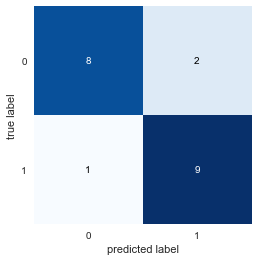

In [26]:
#confusion matrix

plot_confusion_matrix(confusion_matrix(y_test, y_pred))

In [27]:
svc4 = SVC(kernel='linear', C=0.01)
svc4.fit(X_test, y_test)
y_pred4 = svc4.predict(X_test)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x24d4eff5a88>)

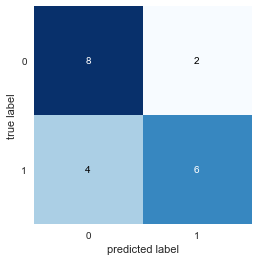

In [28]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred4))

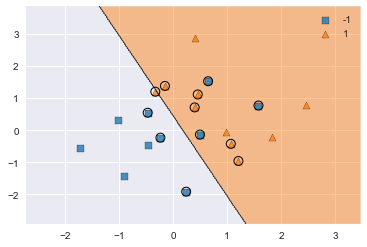

In [29]:
svc5 = SVC(kernel='linear', C=1e5)
svc5.fit(X, y)

plot_decision_regions(X, y, clf=svc5, X_highlight=svc5.support_vectors_)

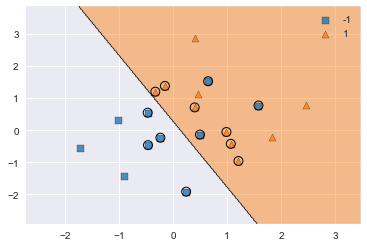

In [30]:
svc6 = SVC(kernel='linear', C=1)
svc6.fit(X, y) 

plot_decision_regions(X, y, clf=svc6, X_highlight=svc6.support_vectors_)

## 2. Support Vector Machine

In [31]:
np.random.seed(42)

X = np.random.normal(size=400).reshape(200,2)
X[0:100, :] += 2 ; X[100:150, :] -= 2
y = np.concatenate((np.full(150, 1, dtype=np.int64), np.full(50, 2, dtype=np.int64)))

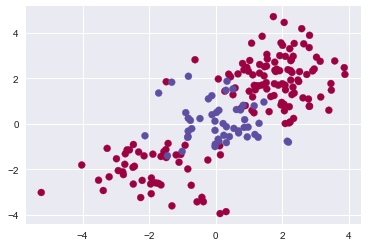

In [32]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='Spectral')

In [33]:
#train, test split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=42)

In [34]:
# modeling

svm = SVC(kernel='rbf', gamma=1, C=1)
svm.fit(X_train, y_train)

SVC(C=1, gamma=1)

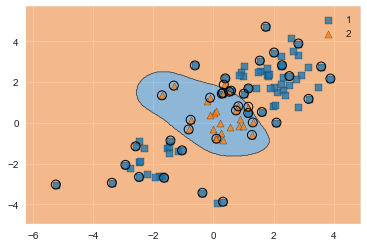

In [35]:
plot_decision_regions(X_train, y_train, clf=svm, X_highlight=svm.support_vectors_)

In [36]:
svm2 = SVC(kernel='rbf', gamma=1, C=1e5)
svm2.fit(X_train, y_train)

SVC(C=100000.0, gamma=1)

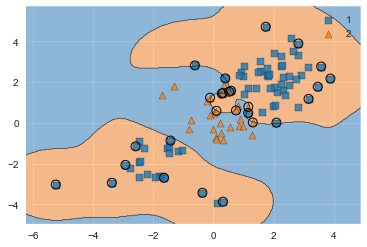

In [37]:
plot_decision_regions(X_train, y_train, clf=svm2, X_highlight=svm2.support_vectors_)

In [38]:
# GridSearch

c_space = np.array([0.1, 1, 10, 100, 1000])
g_space = np.array([0.5, 1, 2, 3, 4])
param_grid = {'C':c_space, 'gamma':g_space}

In [39]:
svm3 = SVC(kernel='rbf')
tune = GridSearchCV(svm3, param_grid, cv=10)
tune.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([0.5, 1. , 2. , 3. , 4. ])})

In [40]:
tune.cv_results_

{'mean_fit_time': array([1.29983425e-03, 1.02949142e-04, 4.98890877e-04, 4.40621376e-04,
        2.65860558e-03, 1.69425011e-03, 0.00000000e+00, 1.05476379e-04,
        1.56147480e-03, 0.00000000e+00, 1.59125328e-03, 3.14054489e-03,
        0.00000000e+00, 1.37298107e-03, 1.56185627e-03, 1.56250000e-03,
        3.15749645e-03, 1.56016350e-03, 1.94449425e-03, 9.25445557e-04,
        1.57840252e-03, 1.72781944e-03, 5.89704514e-04, 9.96112823e-05,
        3.14071178e-03]),
 'std_fit_time': array([0.00240414, 0.00030885, 0.0004991 , 0.00047522, 0.00325805,
        0.00474257, 0.        , 0.00031643, 0.00468442, 0.        ,
        0.00477376, 0.00628118, 0.        , 0.0016934 , 0.00468557,
        0.0046875 , 0.00631499, 0.00468049, 0.00470993, 0.00244561,
        0.00473521, 0.00470653, 0.00079514, 0.00029883, 0.00628153]),
 'mean_score_time': array([0.00032315, 0.00108705, 0.00030427, 0.00036042, 0.00010045,
        0.00010509, 0.        , 0.        , 0.00156314, 0.00156202,
        0.  

In [41]:
tune.best_params_

{'C': 1.0, 'gamma': 0.5}

In [42]:
# evalutation

y_pred = tune.predict(X_test)

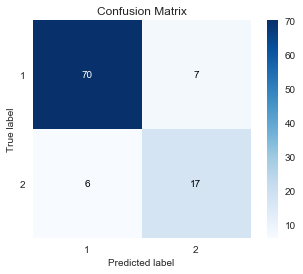

In [46]:
# confusion matrix
conf = skplt.metrics.plot_confusion_matrix(y_test, y_pred)
buttom, top = conf.get_ylim()
conf.set_ylim(buttom+0.5, top-0.5)
conf;

## 3. ROC Curves

In [47]:
svm4 = SVC(kernel='rbf', gamma=2, C=1, probability=True)
svm5 = SVC(kernel='rbf', gamma=50, C=1, probability=True)

In [48]:
svm4.fit(X_train, y_train)
svm5.fit(X_train, y_train)

SVC(C=1, gamma=50, probability=True)

In [49]:
y_probas4 = svm4.predict_proba(X_train) #class가 아니라 확률값을 반환
y_probas5 = svm5.predict_proba(X_train)

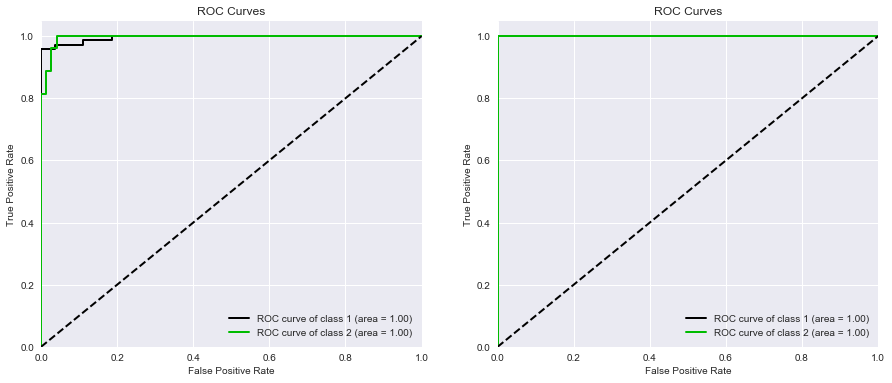

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(15,6), sharex=False, sharey=False)

skplt.metrics.plot_roc_curve(y_train, y_probas4, curves=['each_class'], ax=ax[0])
skplt.metrics.plot_roc_curve(y_train, y_probas5, curves=['each_class'], ax=ax[1])

In [52]:
y_probas_test4 = svm4.predict_proba(X_test)
y_probas_test5 = svm5.predict_proba(X_test)

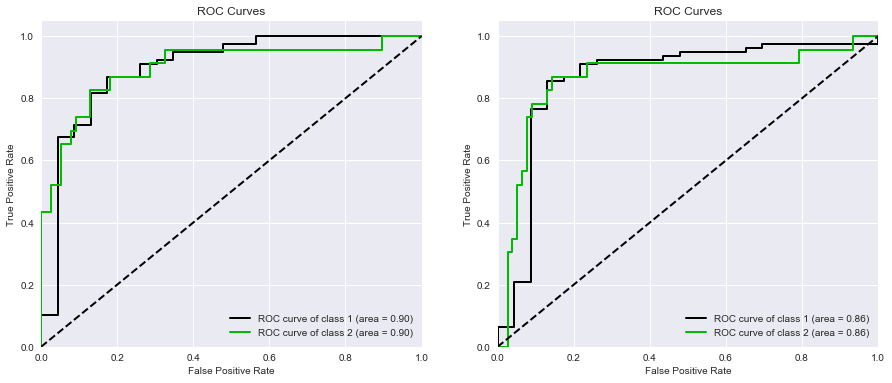

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(15,6), sharex=False, sharey=False)

skplt.metrics.plot_roc_curve(y_test, y_probas_test4, curves=['each_class'], ax=ax[0])
skplt.metrics.plot_roc_curve(y_test, y_probas_test5, curves=['each_class'], ax=ax[1])

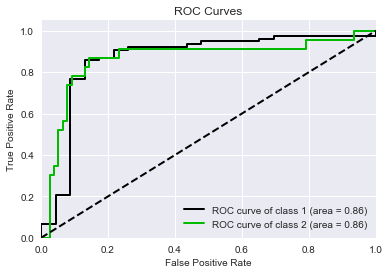

In [57]:
svm6 = SVC(kernel='rbf', gamma=0.5, C=1, probability=True)
svm6.fit(X_train, y_train)
y_probas_test6 = svm5.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas_test6, curves=['each_class']);

## 4. SVM with Multiple Classes

In [58]:
np.random.seed(42)

X = np.random.normal(size=400).reshape(200,2)
X[0:100, :] += 2
X[100:150, :] -= 2
X = np.concatenate((X, np.random.normal(size=100).reshape(50,2)))

y = np.concatenate((np.full(150, 1, dtype=np.int64), np.full(50, 2, dtype=np.int64)))
y = np.concatenate((y, np.full(50, 0, dtype=np.int64)))

X[y==0, 1] += 2

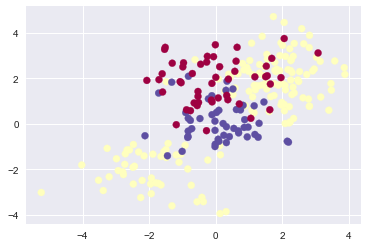

In [60]:
plt.scatter(X[:, 0], X[:,1], c=y+1, cmap='Spectral');

In [61]:
svm_m = SVC(kernel='rbf', gamma=1, C=10)
svm_m.fit(X, y)

SVC(C=10, gamma=1)

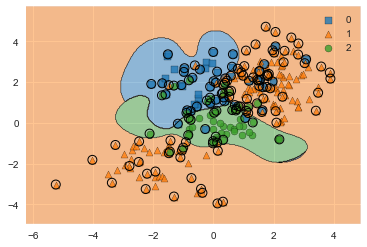

In [64]:
plot_decision_regions(X, y, clf=svm_m, X_highlight=svm_m.support_vectors_);

## 5. Application to Gene Expression Data

In [66]:
khan_X_train = pd.read_csv('../datasets/Khan_xtrain.csv', index_col=0)
khan_y_train = pd.read_csv('../datasets/Khan_ytrain.csv', index_col=0)
khan_X_test = pd.read_csv('../datasets/Khan_xtest.csv', index_col=0)
khan_y_test = pd.read_csv('../datasets/Khan_ytest.csv', index_col=0)

In [67]:
print(khan_X_train.shape, khan_X_test.shape, khan_y_train.shape, khan_y_test.shape)

(63, 2308) (20, 2308) (63, 1) (20, 1)


In [70]:
khan_y_train.iloc[:,0].value_counts(sort=False)

1     8
2    23
3    12
4    20
Name: x, dtype: int64

In [72]:
khan_y_test.iloc[:,0].value_counts(sort=False)

1    3
2    6
3    6
4    5
Name: x, dtype: int64

In [73]:
out = SVC(kernel='linear', C=10)
out.fit(khan_X_train, khan_y_train.iloc[:, 0])

SVC(C=10, kernel='linear')

In [74]:
khan_y_train_pred = out.predict(khan_X_train)

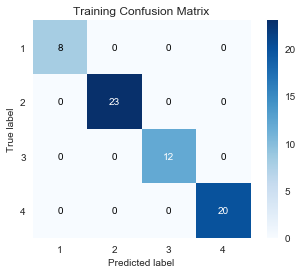

In [82]:
conf = skplt.metrics.plot_confusion_matrix(khan_y_train, khan_y_train_pred, title='Training Confusion Matrix')
buttom, top = conf.get_ylim()
conf.set_ylim(buttom+0.5, top-0.5)
conf;

In [83]:
khan_y_test_pred = out.predict(khan_X_test)

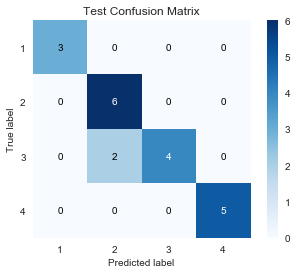

In [85]:
conf = skplt.metrics.plot_confusion_matrix(khan_y_test, khan_y_test_pred, title='Test Confusion Matrix')
buttom, top = conf.get_ylim()
conf.set_ylim(buttom+0.5, top-0.5)
conf;